In [38]:
!pip install pygad

In [39]:
import pygad
import numpy as np
import matplotlib.pyplot as plt

In [40]:
# Define fitness function
# Imagine, we have 14 goods that have such weights and prices

weights = [4, 2, 2, 1, 3, 8, 12, 3, 6, 5, 5, 10, 11, 13]
prices = [ 3000, 2000, 2500, 1000, 1200, 800, 8850, 5500, 3200, 18000, 4500, 1900, 8500, 10000]
max_weight = 17 # Maximum weight that can takes a backpack

In [41]:
# Fitness function
def fitness_func(ga_instance, solution, solution_idx):
    total_weight = np.sum(solution*weights)
    total_price = np.sum(solution * prices)
    # If the weight exceeded - a fine
    if total_weight > max_weight:
        return 0
    return total_price

In [42]:
# Initial population - we can create it avtomatically
# Set the parameters of the genetic algorithm
num_generations = 100     # the quantity of generations
num_parents_mating = 8    # How many parents will be in the crossover
sol_per_pop = 10          # The size of population
num_genes = len(weights)  # Quantity of gens = quantity of goods

# Gene boundaries 0 or 1 take the products or don't take the products
gene_space = [0,1]

In [43]:
ga_instance = pygad.GA(
    suppress_warnings=True,
    gene_space=gene_space,
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=num_genes,
    parent_selection_type='rank',       # Type of parent selection
    crossover_type='single_point',      # Type of crossover
    mutation_type='random',             # Type of mutation
    mutation_percent_genes=15           # The percents for mutation
)

In [44]:
# Learning
ga_instance.run()

In [45]:
# Show results
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print(f'The best solution: {solution}')
print(f'Total cost of goods in the backpack: {solution_fitness}')
print(f'Total weight of goods: {np.sum(solution * weights)}')

The best solution: [0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.]
Total cost of goods in the backpack: 32500.0
Total weight of goods: 17.0


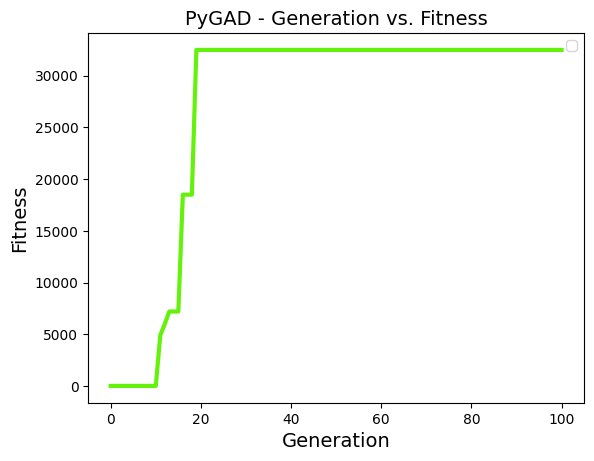

In [46]:
fig = ga_instance.plot_fitness()
plt.show()

**CONCLUSIONS:**

The genetic algorithm effectively solved the knapsack problem by maximizing the total value without exceeding the weight limit. Proper fitness function design, along with well-tuned parameters for selection, crossover, and mutation, significantly improved the results across generations. PyGAD proved to be a flexible and efficient tool for implementing evolutionary optimization.